In [15]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

1)Carga conjunto de datos MNIST con las imagenes de digitos escritas a mano y sus etiquetas
2)Se hace un redimensionado
2.1) 6000 es la cantidad de imagenes en el conjunto de entrenamiento
2.2) 28,28 son las dimensiones de cada imagen en pixel
2.3) 1 es escala de grises
2.4)astype('float32') convierte valores de pixeles a numeros flotantes de 32 bits
2.5) /255 normaliza los valores dividiendo todo entre 255, el cual es su maximo
3) to_categorical convierte las etiquetas en formato de vector binario [0,0,0,1,0,...,0]

In [16]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Muestra del DataSet

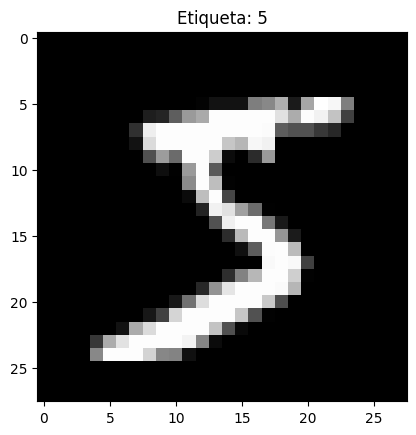

In [17]:


# Imprimir una imagen y su etiqueta del conjunto de entrenamiento
sample_index = 0  # Puedes cambiar este índice para ver diferentes ejemplos
plt.imshow(train_images[sample_index].reshape(28, 28), cmap='gray')
plt.title(f'Etiqueta: {train_labels[sample_index].argmax()}')
plt.show()


In [18]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [19]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)


Epoch 1/5
750/750 [==============================] - 8s 10ms/step - loss: 0.2127 - accuracy: 0.9350 - val_loss: 0.0677 - val_accuracy: 0.9788
Epoch 2/5
750/750 [==============================] - 8s 10ms/step - loss: 0.0549 - accuracy: 0.9825 - val_loss: 0.0496 - val_accuracy: 0.9861
Epoch 3/5
750/750 [==============================] - 8s 11ms/step - loss: 0.0396 - accuracy: 0.9872 - val_loss: 0.0381 - val_accuracy: 0.9886
Epoch 4/5
750/750 [==============================] - 8s 11ms/step - loss: 0.0299 - accuracy: 0.9904 - val_loss: 0.0364 - val_accuracy: 0.9891
Epoch 5/5
750/750 [==============================] - 9s 12ms/step - loss: 0.0263 - accuracy: 0.9915 - val_loss: 0.0421 - val_accuracy: 0.9878


In [21]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Accuracy en datos de prueba: {test_acc}')


313/313 [==============================] - 1s 4ms/step - loss: 0.0363 - accuracy: 0.9878
Accuracy en datos de prueba: 0.9878000020980835


In [22]:
# Supongamos que tienes una imagen específica (puedes cargarla o generarla)
# Aquí usamos la primera imagen del conjunto de prueba como ejemplo
input_image = test_images[0].reshape(1, 28, 28, 1)

# Realizar la predicción
prediction = model.predict(input_image)

# Obtener el índice de la clase predicha
predicted_class = np.argmax(prediction)


1/1 [==============================] - 0s 105ms/step


In [23]:
print(f"La red neuronal predice que la imagen es un '{predicted_class}' con probabilidad {prediction[0][predicted_class]:.2f}")

La red neuronal predice que la imagen es un '7' con probabilidad 1.00


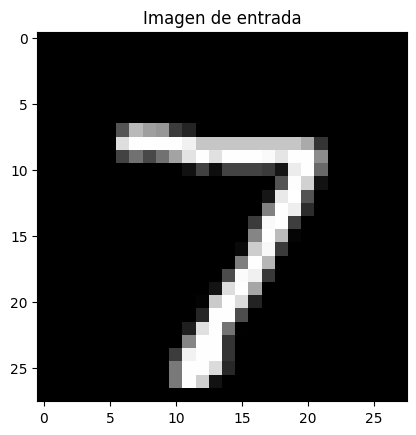

In [25]:
input_image_resize = input_image.reshape(28, 28)
plt.imshow(input_image_resize, cmap='gray')
plt.title('Imagen de entrada')
plt.show()
